In [2]:
"""Topic: Exploring and visualizing NFL statistics in pandas)
Web scraping data from Pro-Football-Reference for analysis
"""

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../helper_functions')

from bs4 import BeautifulSoup
import requests, re
import pandas as pd
import numpy as np

from stat_functions import all_position_stats, all_wide_receiver_quarterback_headers
from get_df import get_wide_receiver_df, all_individual_stats, fantasy_points

import matplotlib.pyplot as plt
import matplotlib.pylab as plb 
%matplotlib inline

import patsy
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline

from yellowbrick.features import Rank2D
from yellowbrick.regressor import ResidualsPlot, PredictionError

import statsmodels.formula.api as smf
import statsmodels.api as sm


In [3]:
# df_all_wide_receivers_2019 = all_position_stats('2019','receiving', 64)
# df_all_wide_receivers_2019.columns = all_wide_receiver_quarterback_headers('2019','receiving')

# df_all_wide_receivers_2019[['Rec','Yds','Yds','Y/R','TD']] = df_all_wide_receivers_2019[['Rec','Yds','Yds','Y/R','TD']].apply(pd.to_numeric)
# df_all_wide_receivers_2019 = df_all_wide_receivers_2019[(df_all_wide_receivers_2019.Pos != 'RB') & (df_all_wide_receivers_2019.Pos != 'rb')
# & (df_all_wide_receivers_2019.Pos != 'TE')]
# df_all_wide_receivers_2019.to_pickle("../pickled/df_all_wide_receivers_2019.pkl")
df_all_wide_receivers_2019 = pd.read_pickle("../pickled/df_all_wide_receivers_2019.pkl")
df_all_wide_receivers_2019


Link              Player   Tm Age Pos  \
Michael Thomas     /players/T/ThomMi05.htm    Michael Thomas*+  NOR  26  WR   
Keenan Allen       /players/A/AlleKe00.htm       Keenan Allen*  LAC  27  WR   
DeAndre Hopkins    /players/H/HopkDe00.htm   DeAndre Hopkins*+  HOU  27  WR   
Julian Edelman     /players/E/EdelJu00.htm      Julian Edelman  NWE  33  WR   
Julio Jones        /players/J/JoneJu02.htm       Julio Jones *  ATL  30  WR   
Allen Robinson     /players/R/RobiAl02.htm      Allen Robinson  CHI  26  WR   
Cooper Kupp        /players/K/KuppCo00.htm         Cooper Kupp  LAR  26  WR   
Tyler Boyd         /players/B/BoydTy00.htm          Tyler Boyd  CIN  25  WR   
Robert Woods       /players/W/WoodRo02.htm        Robert Woods  LAR  27  WR   
D.J. Moore         /players/M/MoorD.00.htm          D.J. Moore  CAR  22  WR   
Chris Godwin       /players/G/GodwCh00.htm       Chris Godwin*  TAM  23  WR   
Davante Adams      /players/A/AdamDa01.htm      Davante Adams*  GNB  27  WR   
Jarvis Landry      /players/L/LandJa00.htm     Jarvis Landry *  CLE  27  WR   
Tyler Lockett      /players/L/LockTy00.htm       Tyler Lockett  SEA  27  WR   
Amari Cooper       /players/C/CoopAm00.htm       Amari Cooper*  DAL  25  WR   
Jamison Crowder    /players/C/CrowJa00.htm     Jamison Crowder  NYJ  26  WR   
Larry Fitzgerald   /players/F/FitzLa00.htm    Larry Fitzgerald  ARI  36  WR   
Odell Beckham Jr.  /players/B/BeckOd00.htm   Odell Beckham Jr.  CLE  27  WR   
DJ Chark           /players/C/CharDJ00.htm           DJ Chark*  JAX  23  WR   
John Brown         /players/B/BrowJo02.htm          John Brown  BUF  29  WR   
DeVante Parker     /players/P/ParkDe01.htm      DeVante Parker  MIA  26  WR   
Courtland Sutton   /players/S/SuttCo00.htm  Courtland Sutton *  DEN  24  WR   
James White        /players/W/WhitJa02.htm        James White   NWE  27       
Christian Kirk     /players/K/KirkCh01.htm      Christian Kirk  ARI  23  WR   
Cole Beasley       /players/B/BeasCo00.htm        Cole Beasley  BUF  30  WR   
Mike Evans         /players/E/EvanMi00.htm         Mike Evans*  TAM  26  WR   
Michael Gallup     /players/G/GallMi00.htm      Michael Gallup  DAL  23  WR   
Emmanuel Sanders   /players/S/SandEm00.htm   Emmanuel Sanders   2TM  32       
Dede Westbrook     /players/W/WestDe00.htm      Dede Westbrook  JAX  26  WR   
Kenny Golladay     /players/G/GollKe00.htm     Kenny Golladay*  DET  26  WR   
Mark Andrews       /players/A/AndrMa00.htm       Mark Andrews*  BAL  23       
Stefon Diggs       /players/D/DiggSt00.htm        Stefon Diggs  MIN  26  WR   
Calvin Ridley      /players/R/RidlCa00.htm       Calvin Ridley  ATL  25  WR   
Danny Amendola     /players/A/AmenDa00.htm      Danny Amendola  DET  34  WR   
Marvin Jones       /players/J/JoneMa02.htm       Marvin Jones   DET  29  WR   
Diontae Johnson    /players/J/JohnDi01.htm    Diontae Johnson   PIT  23  WR   
Mohamed Sanu       /players/S/SanuMo00.htm        Mohamed Sanu  2TM  30       
Tyreek Hill        /players/H/HillTy00.htm        Tyreek Hill*  KAN  25  WR   
Terry McLaurin     /players/M/McLaTe00.htm     Terry McLaurin   WAS  24  WR   
D.K. Metcalf       /players/M/MetcDK00.htm        D.K. Metcalf  SEA  22  WR   
Deebo Samuel       /players/S/SamuDe00.htm        Deebo Samuel  SFO  23  WR   
Sterling Shepard   /players/S/ShepSt00.htm    Sterling Shepard  NYG  26  WR   
Randall Cobb       /players/C/CobbRa00.htm        Randall Cobb  DAL  29  wr   
Curtis Samuel      /players/S/SamuCu00.htm      Curtis Samuel   CAR  23  WR   
Robby Anderson     /players/A/AndeRo04.htm      Robby Anderson  NYJ  26  WR   

                    G  GS  Tgt  Rec  Ctch%   Yds   Y/R  TD  1D Lng Y/Tgt  R/G  \
Michael Thomas     16  15  185  149  80.5%  1725  11.6   9  91  49   9.3  9.3   
Keenan Allen       16  16  149  104  69.8%  1199  11.5   6  63  45   8.0  6.5   
DeAndre Hopkins    15  15  150  104  69.3%  1165  11.2   7  68  43   7.8  6.9   
Julian Edelman     16  13  153  100  65.4%  1117  11.2   6  54  44   7.3  6.3  

In [116]:
# all_wide_receivers_2019 = all_individual_stats(get_wide_receiver_df, df_all_wide_receivers_2019, '2019')
# all_wide_receivers_2019.to_pickle("../pickled/all_wide_receivers_2019.pkl")

all_wide_receivers_2019 = pd.read_pickle("../pickled/all_wide_receivers_2019.pkl")

all_wide_receivers_2019

index            Name  Targets  Receptions  Receiving_Yards    Y/R  \
0        0  Michael Thomas       13          10              123  12.30   
1        1  Michael Thomas       13          10               89   8.90   
2        2  Michael Thomas        7           5               54  10.80   
3        3  Michael Thomas        9           9               95  10.56   
4        4  Michael Thomas       13          11              182  16.55   
..     ...             ...      ...         ...              ...    ...   
624     10  Robby Anderson        5           4               86  21.50   
625     11  Robby Anderson       10           7              101  14.43   
626     12  Robby Anderson       11           7              117  16.71   
627     13  Robby Anderson        6           4               66  16.50   
628     14  Robby Anderson        4           2               32  16.00   

     Receiving_TD  Y/Tgt  Carries  Rush_Yards  Yards_per_Carry  
0               0   9.46      0.0           0              NaN  
1               0   6.85      0.0           0              NaN  
2               1   7.71      0.0           0              NaN  
3               0  10.56      0.0           0              NaN  
4               2  14.00      0.0           0              NaN  
..            ...    ...      ...         ...              ...  
624             1  17.20      0.0           0              NaN  
625             0  10.10      0.0           0              NaN  
626             1  10.64      1.0           4              4.0  
627             0  11.00      0.0           0              NaN  
628             1   8.00      0.0           0              NaN  

[629 rows x 11 columns]

In [117]:
# all_wide_receivers_fantasy_2019 = all_individual_stats(fantasy_points, df_all_wide_receivers_2019, '2019')
# all_wide_receivers_fantasy_2019.to_pickle("../pickled/all_wide_receivers_fantasy_2019.pkl")

all_wide_receivers_fantasy_2019 = pd.read_pickle("../pickled/all_wide_receivers_fantasy_2019.pkl")
all_wide_receivers_fantasy_2019

index            Name  Fantasy_Points
0        1  Michael Thomas             8.9
1        2  Michael Thomas            11.4
2        3  Michael Thomas             9.5
3        4  Michael Thomas            30.2
4        5  Michael Thomas             8.9
..     ...             ...             ...
624     11  Robby Anderson            10.1
625     12  Robby Anderson            18.1
626     13  Robby Anderson             8.6
627     14  Robby Anderson             9.2
628     15  Robby Anderson             1.8

[629 rows x 3 columns]

In [118]:
df_receiving_fantasy_2019 = all_wide_receivers_2019.iloc[:,1:2]

df_receiving_fantasy_2019 = pd.concat([df_receiving_fantasy_2019, all_wide_receivers_2019.iloc[:,2:]],axis=1)

df_receiving_fantasy_2019 = df_receiving_fantasy_2019.fillna(0)

df_receiving_fantasy_2019 = df_receiving_fantasy_2019.groupby('Name').expanding().mean().reset_index()

df_receiving_fantasy_2019 = df_receiving_fantasy_2019.sort_values('level_1').reset_index()

df_receiving_fantasy_2019 = df_receiving_fantasy_2019.drop(['index','level_1'],axis=1)

df_receiving_fantasy_2019['Fantasy_Points'] = all_wide_receivers_fantasy_2019.iloc[:,-1:]

df_receiving_fantasy_2019 = df_receiving_fantasy_2019.drop(['Carries','Y/Tgt'], axis=1)

df_receiving_fantasy_2019 = df_receiving_fantasy_2019.fillna(0)

df_receiving_fantasy_2019.to_pickle("../pickled/df_receiving_fantasy_2019.pkl")

df_receiving_fantasy_2019 = pd.read_pickle("../pickled/df_receiving_fantasy_2019.pkl")

df_receiving_fantasy_2019 = df_receiving_fantasy_2019.iloc[:,1:]

df_receiving_fantasy_2019

Targets  Receptions  Receiving_Yards        Y/R  Receiving_TD  \
0    13.000000   10.000000       123.000000  12.300000      0.000000   
1    13.000000   10.000000       106.000000  10.600000      0.000000   
2    11.000000    8.333333        88.666667  10.666667      0.333333   
3    10.500000    8.500000        90.250000  10.640000      0.250000   
4    11.000000    9.000000       108.600000  11.822000      0.600000   
..         ...         ...              ...        ...           ...   
624   5.272727    2.636364        40.454545  13.485455      0.272727   
625   5.666667    3.000000        45.500000  13.564167      0.250000   
626   6.076923    3.307692        51.000000  13.806154      0.307692   
627   6.071429    3.357143        52.071429  13.998571      0.285714   
628   5.933333    3.266667        50.733333  14.132000      0.333333   

     Rush_Yards  Yards_per_Carry  Fantasy_Points  
0      0.000000         0.000000             8.9  
1      0.000000         0.000000            11.4  
2      0.000000         0.000000             9.5  
3      0.000000         0.000000            30.2  
4      0.000000         0.000000             8.9  
..          ...              ...             ...  
624    0.000000         0.000000            10.1  
625    0.000000         0.000000            18.1  
626    0.307692         0.307692             8.6  
627    0.285714         0.285714             9.2  
628    0.266667         0.266667             1.8  

[629 rows x 8 columns]

In [119]:
df_receiving_fantasy_2019.corr()

Targets  Receptions  Receiving_Yards       Y/R  \
Targets          1.000000    0.864720         0.650103 -0.166315   
Receptions       0.864720    1.000000         0.706805 -0.202149   
Receiving_Yards  0.650103    0.706805         1.000000  0.407284   
Y/R             -0.166315   -0.202149         0.407284  1.000000   
Receiving_TD     0.120248    0.136550         0.424279  0.343496   
Rush_Yards      -0.029751   -0.051529        -0.198337 -0.154883   
Yards_per_Carry -0.025048   -0.116925         0.038799  0.095679   
Fantasy_Points   0.042571    0.038585         0.054988  0.043881   

                 Receiving_TD  Rush_Yards  Yards_per_Carry  Fantasy_Points  
Targets              0.120248   -0.029751        -0.025048        0.042571  
Receptions           0.136550   -0.051529        -0.116925        0.038585  
Receiving_Yards      0.424279   -0.198337         0.038799        0.054988  
Y/R                  0.343496   -0.154883         0.095679        0.043881  
Receiving_TD         1.000000   -0.136910        -0.094760        0.025479  
Rush_Yards          -0.136910    1.000000         0.103084       -0.036958  
Yards_per_Carry     -0.094760    0.103084         1.000000        0.043888  
Fantasy_Points       0.025479   -0.036958         0.043888        1.000000

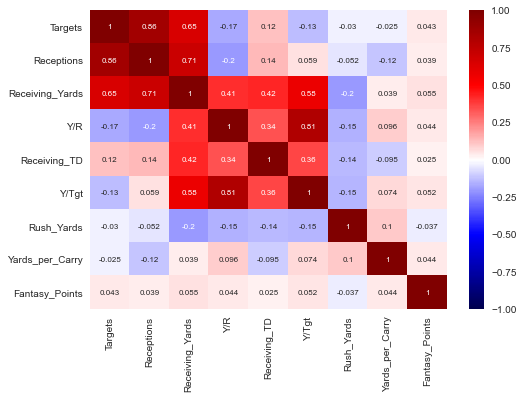

In [89]:
# example of a better corr matrix
# do this for all running backs, wide receivers, and quarterbacks
features_map = sns.heatmap(df_receiving_fantasy_2019.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, annot_kws={"fontsize":8})
fig = features_map.get_figure()
fig.savefig("features_map.png") 

# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

<AxesSubplot:title={'center':'Pearson Ranking of 9 Features'}>

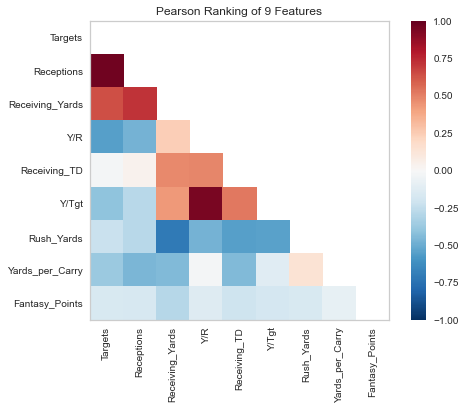

In [90]:
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(df_receiving_fantasy_2019.corr())
visualizer.show(outpath="pcoords.png")

<Figure size 1440x540 with 0 Axes>

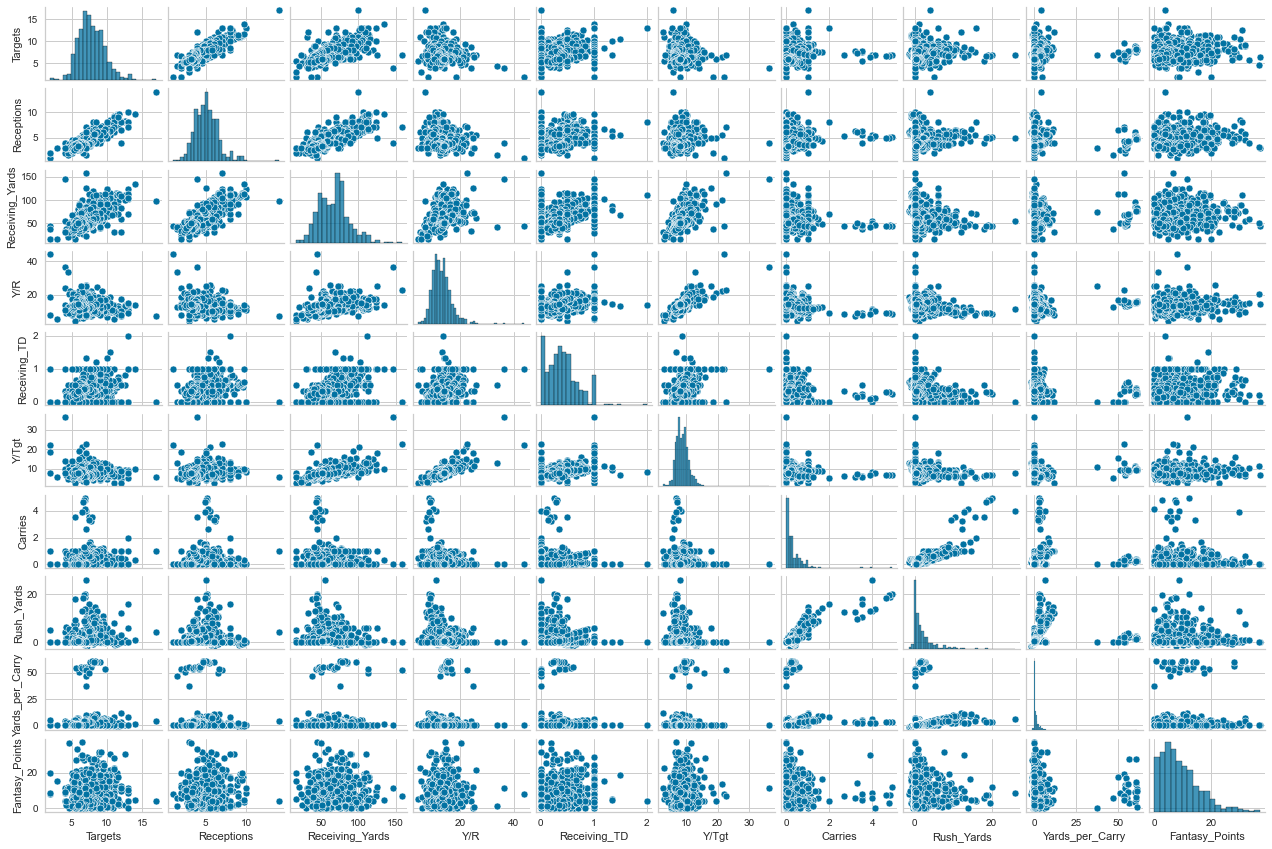

In [62]:
# do this for all running backs, wide receivers, and quarterbacks
plt.figure(figsize = [20,7.5])

sns.pairplot(df_receiving_fantasy_2019, height=1.2, aspect=1.5);

#### Cross-Validation For Model Selection

Demonstrates two typical workflows for using validation data to select models. It also demonstrates the use of some utility methods like generating **polynomial features**, converting **categorical features to "dummy variable"** binary columns, and **scaling features** when applying regularization.

**Contents Below**

> 1. Simple preprocessing and dummy variables
> 2. Basic validation method: Train/validation/test
> 3. Rigorous validation method: Cross-validation/test
> 4. Making CV less manual via scikit-learn

## 1. Preprocessing and Dummy Variables

## 2. Simple Validation Method: Train / Validation / Test

Break data into 3 portions: 60% for training, 20% for validation (used to select the model), 20% for final testing evaluation.

In [120]:
X, y = df_receiving_fantasy_2019.drop('Fantasy_Points',axis=1), df_receiving_fantasy_2019['Fantasy_Points']

# # hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) #why does the random state change results?

In [121]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

Model Setup: **when using regularization, we must standardize** the data so that all features are on the same scale (we subtract the mean of each column and divide by the standard deviation, giving us features with mean 0 and std 1). Since this scaling is part of our model, we need to scale using the training set feature distributions and apply the same scaling to validation and test without refitting the scaler. 

Also, we need to get **polynomial features** for the poly model

In [122]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

# Higher alpha = strong regularization strength 
lm_las = Lasso(alpha=0.11097524964120721)
lm_reg = Ridge(alpha=100)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

<AxesSubplot:>

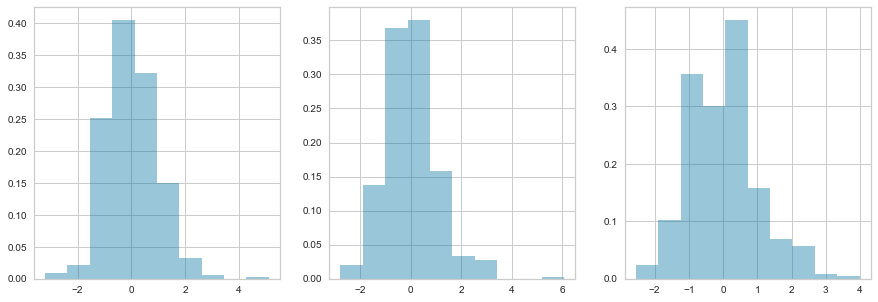

In [123]:
# Plot histograms of a few transformed variables
# Note that they seem to have means of 0 and stddevs of 1
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(X_train_scaled[:, 0], label='feature 1', ax=axes[0], kde=False, bins=10, norm_hist=True)
sns.distplot(X_train_scaled[:, 1], label='feature 2', ax=axes[1], kde=False, bins=10, norm_hist=True)
sns.distplot(X_train_scaled[:, 2], label='feature 3', ax=axes[2], kde=False, bins=10, norm_hist=True)


In [124]:
lm.fit(X_train_scaled, y_train)
print(f'Linear Regression Train R^2: {lm.score(X_train_scaled, y_train):.3f}')
print(f'Linear Regression Val R^2: {lm.score(X_val_scaled, y_val):.3f}')
print(f'Linear Regression Test R^2: {lm.score(X_test_scaled, y_test):.3f}\n')

lm_las.fit(X_train_scaled, y_train)

print(f'Lasso Regression Train R^2: {lm_las.score(X_train_scaled, y_train):.3f}')
print(f'Lasso Regression Val Scaled R^2: {lm_las.score(X_val_scaled, y_val):.3f}')
print(f'Lasso Regression Test R^2: {lm_las.score(X_test_scaled, y_test):.3f}\n')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression Train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression Val Scaled R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print(f'Ridge Regression Test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}\n')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression Train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression Val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
print(f'Degree 2 polynomial regression Test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Linear Regression Train R^2: 0.044
Linear Regression Val R^2: -0.056
Linear Regression Test R^2: -0.072

Lasso Regression Train R^2: 0.042
Lasso Regression Val Scaled R^2: -0.043
Lasso Regression Test R^2: -0.054

Ridge Regression Train R^2: 0.041
Ridge Regression Val Scaled R^2: -0.041
Ridge Regression Test R^2: -0.053

Degree 2 polynomial regression Train R^2: 0.131
Degree 2 polynomial regression Val R^2: -0.184
Degree 2 polynomial regression Test R^2: -0.112


Negative R^2 equals severe overfitting! 

So having run this validation step, we see that the evidence points to Lasso regression being the best model. So our validation process lets us **select** that choice of model, and as our final step we retrain it on the entire chunk of train/val data and see how it does on test data:  

## 3. Rigorous Validation Method: Cross-Validation / Test

Break data into 2 portions: 80% for a cross-validated training process, and 20% for final testing evaluation. 

Remember that the idea of CV is to make efficient use of the data available to us (using 80% instead of 60% above), while also performing multiple validation checks. For k-fold CV, we come up with k train/validation splits of the whole chunk of data, in such a way that **each observation is in the validation set exactly 1 time**. 

For simplicity we'll focus on linear regression and ridge regression (we also can feel pretty comfortable throwing out the full degree 2 polynomial regression based on the poor results above!) As we loop through our CV folds, we will train and validate both models and collect the results to compare at the end. Note that we scale the training features within the CV loop.

In [125]:
#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [126]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_train_r2s, cv_lm_val_r2s, cv_lm_las_r2s, cv_lm_reg_r2s, rmses = [], [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm.fit(X_train, y_train)
    cv_lm_train_r2s.append(lm.score(X_train, y_train))
    cv_lm_val_r2s.append(lm.score(X_val, y_val))

    
    lm_rmse = mean_squared_error(y_val, lm.predict(X_val), squared=False)

    rmses.append(lm_rmse)

    # setup for ridge and lasso 
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    #lass with feature scaling 
    lm_las.fit(X_train_scaled, y_train)
    cv_lm_las_r2s.append(lm_las.score(X_val_scaled, y_val))

    #ridge with feature scaling
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_val_r2s)
print('Lasso scores: ', cv_lm_las_r2s, '\n')
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Lasso mean cv r^2: {np.mean(cv_lm_las_r2s):.3f} +- {np.std(cv_lm_las_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

print(f'Simple mean cv r^2 (TRAIN): {np.mean(cv_lm_train_r2s):.3f} +- {np.std(cv_lm_train_r2s):.3f}')
print(f'Simple mean cv r^2 (VAL): {np.mean(cv_lm_val_r2s):.3f} +- {np.std(cv_lm_val_r2s):.3f}')
print(f'Simple mean RMSE: {np.mean(rmses):.3f} +- {np.std(rmses):.3f}')

Simple regression scores:  [-0.061104580978502465, -0.06833186721570583, -0.007716125332931867, -0.023371521839212317, -0.06468281328939862]
Lasso scores:  [-0.008341412481556842, -0.05938774192761964, -0.0029575067382023867, 0.0012726958645639108, -0.01598599294285319] 

Ridge scores:  [-0.017372387547599955, -0.05593865167825962, 0.003408085479916667, -0.0001985788776832642, -0.023637500326987082] 

Lasso mean cv r^2: -0.017 +- 0.022
Ridge mean cv r^2: -0.019 +- 0.021
Simple mean cv r^2 (TRAIN): 0.026 +- 0.006
Simple mean cv r^2 (VAL): -0.045 +- 0.025
Simple mean RMSE: 6.737 +- 0.547


The plot thickens! Our simple validation method above pointed to simple linear regression being better than lasso and ridge, but k-fold shows the opposite. The lasso model appears to be both better on average and has less varying results.

**Since k-fold is more reliable than a single validation set, we select the lasso regression model**. This shows the dangers of relying on simple validation methods, especially when our sample sizes are small.

In [127]:
list(zip(df_receiving_fantasy_2019.columns,lm_las.coef_))

[('Targets', 0.5156868799927071),
 ('Receptions', 0.0),
 ('Receiving_Yards', -0.0),
 ('Y/R', 0.3089049126901182),
 ('Receiving_TD', -0.16339893542720882),
 ('Rush_Yards', -0.4215477178601472),
 ('Yards_per_Carry', 0.33951305193183756)]

In [128]:
list(zip(df_receiving_fantasy_2019.columns,lm_reg.coef_))

[('Targets', 0.4371474899664469),
 ('Receptions', 0.20826551740723181),
 ('Receiving_Yards', -0.1142369760642197),
 ('Y/R', 0.4095646020204914),
 ('Receiving_TD', -0.22298597571771814),
 ('Rush_Yards', -0.4344673208921326),
 ('Yards_per_Carry', 0.36912643104825366)]

**LASSO**:
* _Pro_: great for trimming features and focusing interpretation on a few key ones
* _Con_: risk of discarding features that are actually useful

**Ridge**:
* _Pro_: great for smoothly handling multicollinearity, very nice when working with sparse features 
* _Con_ (ish): will never fully discard features

As always, you have to validate to choose between the two. If the mapping from features to target truly depends on only a few key features, LASSO should outperform. If instead the target actually depends on many features (even if only a little dependent), Ridge should work better.  

## 4. Tuning Regularization Strength via Validation

Here we will attempt to find the "best" value of the regularization strength alpha for this feature and target set and the LASSO model. We'll use simple validation (single train/valid split) as our model selection method.

We will first decide on a vector of "candidate" alpha values.  Then, for each candidate value, we run the following steps:

> 1. Fit a LASSO model on the training data
> 2. Using the newly trained model, make predictions on the validation data
> 3. Run evaluation metrics on validation

Then we plot how the errors change for the different values of alpha, and see where alpha minimizes our error metric on the validation data. This value of alpha is the one we would select for our final model.

In [129]:
test_set_pred = lm_las.predict(X_test)

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

9.87333406541303

In [130]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    # pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    pipe.fit(X_train, y_train)
    
    # val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    val_set_pred = pipe.predict(X_val)
    err_vec_val[i] = mae(y_val, val_set_pred)

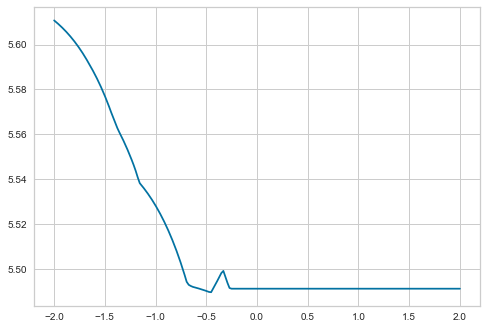

In [131]:
#plot the curve of validation error as alpha changes

plt.plot(np.log10(alphalist), err_vec_val)

In [132]:
## This is the minimum error achieved on the validation set 
## across the different alpha values we tried

np.min(err_vec_val)

5.489768238147841

In [133]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

0.352970730273065

---
**Regularization Tuning Exercise**: 

Repeat the model selection workflow above (simple validation), but using a ridge model instead of a LASSO model. Based on the evidence you gather, do you think that a ridge or LASSO model has better predictive power on this dataset?

---

In [134]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('Ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    # pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    pipe.fit(X_train, y_train)
    
    # val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    val_set_pred = pipe.predict(X_val)
    err_vec_val[i] = mae(y_val, val_set_pred)

In [135]:
## This is the minimum error achieved on the validation set 
## across the different alpha values we tried

np.min(err_vec_val)

5.530247357672483

In [136]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

100.0

## LassoCV for Running Backs

In [137]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lm_las_CV = LassoCV(alphas = alphavec, cv=5)
lm_las_CV.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [138]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lm_las_CV.alpha_

0.11097524964120721

In [139]:
# L = LassoCV()
# s = StandardScaler(with_mean=False)
# X_train_poly_scaled = s.fit_transform(X_train_poly)
# L.fit(X_train_poly_scaled, y_train)

# print("Training Score: ", L.score(X_train_poly_scaled, y_train), "Test Score: " , L.score(s.transform(p.transform(X_test)),y_test))

In [140]:
# R = RidgeCV()
# R.fit(X_train_poly_scaled, y_train)

# print("Training Score: ", R.score(X_train_poly_scaled, y_train), "Test Score: " , R.score(s.transform(p.transform(X_test_scaled)),y_test))

## 3. Standard-scaling Features (a must for regularization!)

One issue with Regularized Linear Regression is that the "size" of a coefficient may be more reflective of the units or scale of the associated variable than the actual power of the relationship.  For example, if a distance is measured in millimeters it will have a larger coefficient than if it is measured in miles.  For this reason, best practice is to "standardize" the variables prior to running a regularized regression.  Standardizing means subtracting off each feature column's mean and then dividing by its standard deviation so that the resulting variable has mean 0 and standard deviation 1. This ensures that the variables are penalized fairly with respect to one another.

We demonstrate how to do this below.

## Linear Regression Modeling

Text(0, 0.5, 'Actual Values')

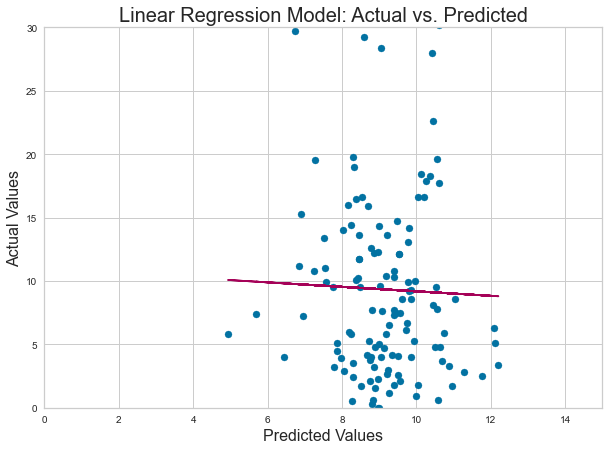

In [141]:
lm_predict = lm.predict(X_test)

plt.figure(figsize=(10,7))
plt.scatter(lm_predict, y_test)
ax = plt.gca()

z = np.polyfit(lm_predict, y_test, 1)
p = np.poly1d(z)
plb.plot(lm_predict, p(lm_predict), "m-")

df_receiving_fantasy_2019 = df_receiving_fantasy_2019.fillna(0)
plt.xlim(0,15)
plt.ylim(0,30)

plt.title('Linear Regression Model: Actual vs. Predicted', fontsize=20)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Actual Values', fontsize=16)

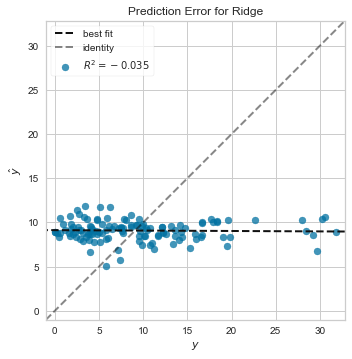

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [142]:
visualizer = PredictionError(Ridge(alpha=3.181))
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

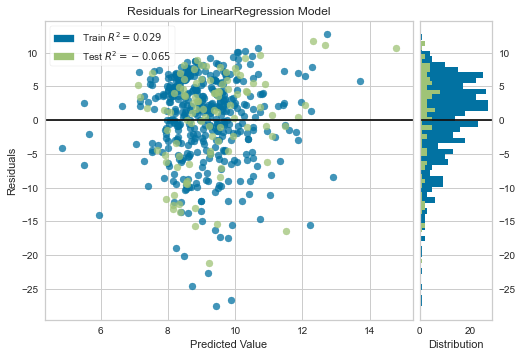

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [143]:
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_val_scaled, y_val)
visualizer.show()

In [147]:
df_receiving_fantasy_2019_predicted = df_receiving_fantasy_2019
df_receiving_fantasy_2019_predicted['Tested_Fantasy_Points'] = pd.DataFrame(y_test)
df_receiving_fantasy_2019_predicted['Predicted_Fantasy_Points'] = pd.DataFrame(lm_predict)
df_receiving_fantasy_2019_predicted['Name'] = all_wide_receivers_2019.iloc[:,1:2]
df_receiving_fantasy_2019_predicted = df_receiving_fantasy_2019_predicted.dropna()
df_receiving_fantasy_2019_predicted.to_csv('Final_WR_Dataframe.csv', index=False)
df_receiving_fantasy_2019_predicted


Targets  Receptions  Receiving_Yards        Y/R  Receiving_TD  \
3    10.500000    8.500000        90.250000  10.640000      0.250000   
10   11.272727    9.454545       112.909091  11.910909      0.545455   
13   11.357143    9.500000       110.857143  11.562143      0.571429   
14   11.733333    9.666667       112.533333  11.546667      0.600000   
16   12.500000    8.000000       110.500000  13.815000      0.500000   
17   14.000000    9.666667       134.666667  13.903333      1.000000   
18   11.750000    8.500000       113.000000  12.827500      0.750000   
20    9.833333    6.666667        83.833333  12.051667      0.500000   
21   10.000000    6.285714        80.571429  12.508571      0.428571   
23    9.333333    6.000000        73.000000  12.051111      0.333333   
24    9.500000    6.200000        72.500000  11.696000      0.300000   
29    9.266667    6.333333        74.466667  11.931333      0.333333   
30   13.000000    8.000000       111.000000  13.880000      2.000000   
31   10.500000    6.500000        75.500000  10.940000      1.000000   
32    9.333333    6.333333        72.666667  11.016667      0.666667   
34    8.800000    6.200000        69.400000  10.764000      0.400000   
35    9.333333    6.666667        67.000000   9.988333      0.333333   
45    7.500000    5.000000        67.000000  13.290000      0.000000   
46    8.333333    5.666667        65.333333  11.813333      0.333333   
52   10.000000    7.000000        73.666667  10.512222      0.444444   
53   10.000000    6.800000        71.600000  10.521000      0.400000   
56   10.384615    6.923077        77.692308  11.260769      0.461538   
57   10.000000    6.571429        72.785714  10.777857      0.428571   
59   11.000000    6.000000        31.000000   5.170000      1.000000   
62    9.250000    5.750000        79.250000  13.842500      1.000000   
63    8.800000    5.200000        71.800000  13.874000      0.800000   
71    9.923077    6.307692        88.461538  14.783077      0.461538   
77    8.600000    6.200000        75.400000  11.936000      0.400000   
80    8.875000    5.875000        66.500000  10.847500      0.375000   
90   10.333333    7.666667        89.000000  13.250000      0.666667   
91   11.500000    8.000000        97.000000  13.297500      0.750000   
92   12.600000    8.200000       101.000000  13.238000      0.800000   
94   11.000000    7.285714        81.714286  11.252857      0.571429   
105  11.000000    8.000000        83.333333  10.343333      0.000000   
106   9.750000    6.750000        70.750000  10.507500      0.000000   
115   9.153846    5.615385        64.076923  10.524615      0.230769   
119   7.500000    5.000000        51.500000  12.625000      0.000000   
121   9.500000    6.500000        76.750000  12.800000      0.000000   

     Rush_Yards  Yards_per_Carry  Fantasy_Points  Tested_Fantasy_Points  \
3      0.000000         0.000000            30.2                   30.2   
10    -0.818182        -0.818182             4.8                    4.8   
13    -0.642857        -0.642857            19.6                   19.6   
14    -0.600000        -0.600000             3.7                    3.7   
16     0.000000         0.000000            30.6                   30.6   
17     1.000000         1.000000             4.8                    4.8   
18     0.750000         0.750000             1.8                    1.8   
20     0.500000         0.500000             6.1                    6.1   
21     0.428571         0.428571             5.3                    5.3   
23     0.333333         0.333333             8.6                    8.6   
24     2.100000         2.100000            13.1                   13.1   
29     1.066667         1.066667            14.2                   14.2   
30     0.000000         0.000000             4.0                    4.0   
31     0.000000         0.000000             6.7                    6.7   
32     0.000000         0.000000             2.1                    2.1  

In [145]:
df_receiving_fantasy_2019_predicted.iloc[:,-3:-1].mean()

Tested_Fantasy_Points       10.573684
Predicted_Fantasy_Points     9.251991
dtype: float64

## Ridge Regression Modeling

Text(0, 0.5, 'Actual Values')

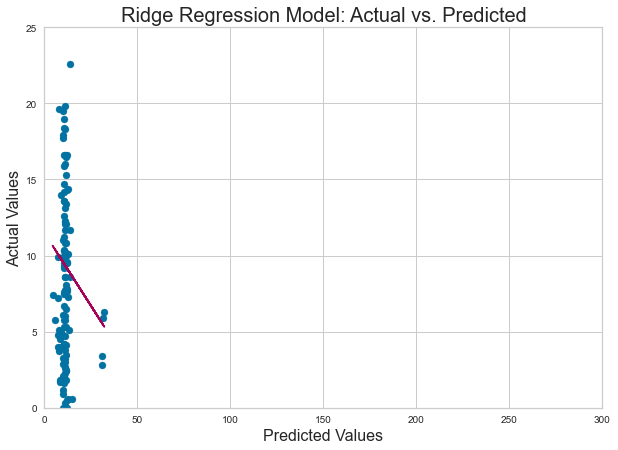

In [148]:
lm_reg_predict = lm_reg.predict(X_test)

plt.figure(figsize=(10,7))
plt.scatter(lm_reg_predict, y_test)

z = np.polyfit(lm_reg_predict, y_test, 1)
p = np.poly1d(z)
plb.plot(lm_reg_predict, p(lm_reg_predict), "m-")

plt.xlim(0,300)
plt.ylim(0,25)

plt.title('Ridge Regression Model: Actual vs. Predicted', fontsize=20)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Actual Values', fontsize=16)

## Lasso Regression

Text(0, 0.5, 'Actual Values')

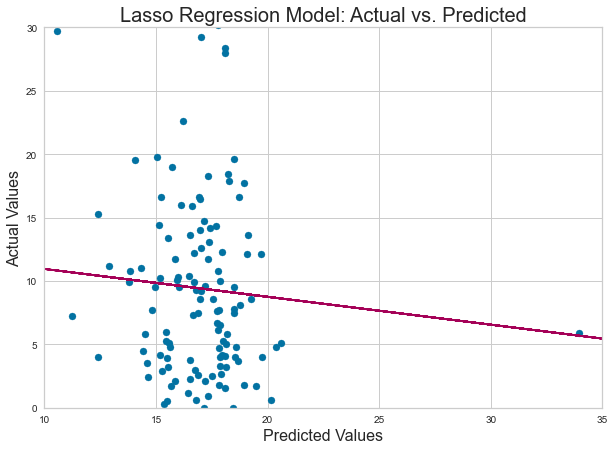

In [149]:
lm_las_predict = lm_las.predict(X_test)

plt.figure(figsize=(10,7))
plt.scatter(lm_las_predict, y_test)

z = np.polyfit(lm_las_predict, y_test, 1)
p = np.poly1d(z)
plb.plot(lm_las_predict, p(lm_las_predict), "m-")

plt.xlim(10,35)
plt.ylim(0,30)

plt.title('Lasso Regression Model: Actual vs. Predicted', fontsize=20)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Actual Values', fontsize=16)

In [157]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Fantasy_Points ~ Receptions + Rush_Yards + Receiving_Yards + Rush_TD + Receiving_TD', data=df_receiving_fantasy_2019, 
return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

PatsyError: Error evaluating factor: NameError: name 'Rush_TD' is not defined
    Fantasy_Points ~ Receptions + Rush_Yards + Receiving_Yards + Rush_TD + Receiving_TD
                                                                 ^^^^^^^

In [151]:
# Define the model
lm1 = smf.ols('Fantasy_Points ~ Rush_Yards + Receiving_Yards + Rush_TD + Receiving_TD', data=df_receiving_fantasy_2019)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

NameError: name 'df_rushing_fantasy_2019' is not defined

In [152]:
# Define the model
lm2 = smf.ols('Fantasy_Points ~ Rush_Yards + Receiving_Yards + Rush_TD + Receiving_TD', data=df_receiving_fantasy_2019)

# Fit the model
fit2 = lm2.fit()

# Print summary statistics of the model's performance
fit2.summary()

NameError: name 'df_rushing_fantasy_2019' is not defined

In [153]:
# Define the model
lm3 = smf.ols('Fantasy_Points ~ Rush_Yards + Receiving_Yards + Rush_TD', data=df_rushing_fantasy_2019)

# Fit the model
fit3 = lm3.fit()

# Print summary statistics of the model's performance
fit3.summary()

NameError: name 'df_rushing_fantasy_2019' is not defined

In [154]:
#Residual plot comparing actual vs. predicted values. In a good model we want our errors to be random. I'm not sure if the below looks too random. It seems to be between -5, so what does that mean? May be missing actual functional dependency underlying the data. This data may not be linear but let's keep going. 
fit1.resid.plot(style='o',figsize=(12,6))

NameError: name 'fit1' is not defined

In [155]:
fit2.resid.plot(style='o',figsize=(12,6))

NameError: name 'fit2' is not defined

In [156]:
fit3.resid.plot(style='o',figsize=(12,6))

NameError: name 'fit3' is not defined